In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import pandas as pd
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Slider, CustomJS, Legend, LegendItem
from bokeh.layouts import column
from bokeh.palettes import Category20
from bokeh.palettes import TolRainbow
from bokeh.transform import factor_cmap
from bokeh.plotting import output_notebook

from itertools import cycle
# Ensure Bokeh plots are displayed in the notebook
output_notebook()


Loading BokehJS ...

# Viz prep

In [20]:
#font_prop = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\source-sans-pro.ttf')
font_reg = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Regular.otf")
font_bold = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Bold.otf")
font_italic = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-It.ttf")
font_light = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Light.otf")

In [21]:
sbt_palette4 = [
    # Pastel main colors
    "#B3D4E0",  # Pastel Light Blue
    "#146A4A",  # Deep Green
    "#E0C15A",  # Warm Yellow
    "#E65A70",  # Coral Pink
    "#4B2C69",  # Deep Purple

    # Pastel extended palette
    "#A8E1E3",  # Light Aqua
    "#2A7764",  # Medium Teal
    "#F0DAA5",  # Pale Yellow
    "#CC9E2F",  # Rich Mustard
    "#7EB6CE",  # Sky Blue
    "#104232",  # Forest Green
    "#F4989C",  # Soft Coral
    "#6B3F7D",  # Indigo Purple
    "#D7E4CC",  # Pale Sage
    "#D97158",  # Terracotta
    "#D2ECF2",  # Powder Blue
    "#2B4C6F",  # Navy Blue
    "#9BD3AE",  # Mint Green
    "#7A8B8D",  # Slate Gray
    "#E8C68B",   # Warm Sand
    
       # New additional colors
    "#FFB6C1",  # Light Pink
    "#FFD700",  # Gold
    "#8A2BE2",  # Blue Violet
    "#98FB98"   # Pale Green
]

# Generel prep

In [22]:
filepath = r'C:\Users\AnjaBrocklehurst\Documents\Data\SBTi Dataviz\ByCompany.csv'
Comp = pd.read_csv(filepath, sep=';')
filepath = r'C:\Users\AnjaBrocklehurst\Documents\Data\SBTi Dataviz\ByTargets.csv'
Targ = pd.read_csv(filepath, sep=';')

In [23]:
#Targ.info()
#Comp.info()
Targ = Targ.copy()
Comp = Comp.copy()

### Categorizing sectors in both Comp and Targ

In [24]:
# Mapping of sectors to categories
sector_category_map = {
    'Ground Transportation - Railroads Transportation': 'Transportation',
    'Semiconductors and Semiconductors Equipment': 'Technology',
    'Air Freight Transportation and Logistics': 'Transportation',
    'Trading Companies and Distributors, and Commercial Services and Supplies': 'Commercial Services',
    'Water Transportation - Water Transportation': 'Transportation',
    'Food and Beverage Processing': 'Food and Beverage',
    'Telecommunication Services': 'Telecommunication',
    'Construction and Engineering': 'Construction',
    'Pharmaceuticals, Biotechnology and Life Sciences': 'Healthcare',
    'Professional Services': 'Professional Services',
    'Containers and Packaging': 'Packaging',
    'Real Estate': 'Real Estate',
    'Consumer Durables, Household and Personal Products': 'Consumer Products',
    'Electric Utilities and Independent Power Producers and Energy Traders (including Fossil, Alternative and Nuclear Energy)': 'Energy',
    'Retailing': 'Retail',
    'Mining - Iron, Aluminum, Other Metals': 'Mining',
    'Textiles, Apparel, Footwear and Luxury Goods': 'Consumer Products',
    'Software and Services': 'Technology',
    'Hotels, Restaurants and Leisure, and Tourism Services': 'Hospitality',
    'Electrical Equipment and Machinery': 'Manufacturing',
    'Food Production - Agricultural Production': 'Food Production',
    'Building Products': 'Construction',
    'Food and Staples Retailing': 'Retail',
    'Automobiles and Components': 'Automotive',
    'Forest and Paper Products - Forestry, Timber, Pulp and Paper, Rubber': 'Forestry and Paper Products',
    'Tobacco': 'Tobacco',
    'Solid Waste Management Utilities': 'Utilities',
    'Chemicals': 'Chemicals',
    'Construction Materials': 'Construction',
    'Technology Hardware and Equipment': 'Technology',
    'Mining - Other (Rare Minerals, Precious Metals and Gems)': 'Mining',
    'Water Utilities': 'Utilities',
    'Homebuilding': 'Construction',
    'Ground Transportation - Highways and Railtracks': 'Transportation',
    'Food Production - Animal Source Food Production': 'Food Production',
    'Healthcare Equipment and Supplies': 'Healthcare',
    'Air Transportation - Airport Services': 'Transportation',
    'Media': 'Media',
    'Banks, Diverse Financials, Insurance': 'Financial Services',
    'Ground Transportation - Trucking Transportation': 'Transportation',
    'Specialized Consumer Services': 'Consumer Services',
    'Specialized Financial Services, Consumer Finance, Insurance Brokerage Firms': 'Financial Services',
    'Healthcare Providers and Services, and Healthcare Technology': 'Healthcare',
    'Water Transportation - Ports and Services': 'Transportation',
    'Air Transportation - Airlines': 'Transportation',
    'Aerospace and Defense': 'Defense',
    'Tires': 'Automotive',
    'Education Services': 'Education',
    'Gas Utilities': 'Utilities'
}

# Function to map sectors to categories
def map_category(sector):
    return sector_category_map.get(sector, 'Unknown')
# Apply the function to the 'sector' column
Targ['sectorCat'] = Targ['sector'].apply(map_category)
Comp['sectorCat'] = Comp['sector'].apply(map_category)
# Display the DataFrame
Targ['sectorCat'].unique()
# Place sectorCat next to sector in the DataFrame
Targ = Targ[['sector', 'sectorCat'] + [col for col in Targ.columns if col not in ['sector', 'sectorCat']]]
Comp = Comp[['sector', 'sectorCat'] + [col for col in Comp.columns if col not in ['sector', 'sectorCat']]]

### Editing Targ df

In [25]:
#make Targ['date_published'] a datetime object
Targ['date_published'] = pd.to_datetime(Targ['date_published'], errors='coerce')
#seperate year from date_published
Targ['Comitted year'] = Targ['date_published'].dt.year
#sort targ by year
Targ = Targ.sort_values(by='Comitted year', ascending=True)
# limit to 2015-2024
Targ = Targ[Targ['Comitted year'].between(2015, 2024)]
#check if year is sorted correctly
Targ['Comitted year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [26]:
# Remove duplicates of stbi_id in Targ to make counting easier
Targ = Targ.drop_duplicates(subset=['company_name'])

### Editing Comp df

In [27]:
Comp['date_updated'] = pd.to_datetime(Comp['date_updated'], errors='coerce')
#isolating year in Comp
Comp['year_updated'] = Comp['date_updated'].dt.year
Comp=Comp.sort_values(by='year_updated', ascending=True)

C:\Users\AnjaBrocklehurst\AppData\Local\Temp\ipykernel_16604\3877062900.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Comp['date_updated'] = pd.to_datetime(Comp['date_updated'], errors='coerce')


In [28]:
#group by year_updated and count the number commitment removed
#Comp['year_updated'] = pd.to_numeric(Comp['year_updated'], errors='coerce')

# Prep of DK data

In [29]:
#create dataframe with only locations with denmark
Targ_dk = Targ[Targ['location'].str.contains('Denmark', na=False)]
Comp_dk = Comp[Comp['location'].str.contains('Denmark', na=False)]

# Viz af DK

## Dk companies comitting over the last years

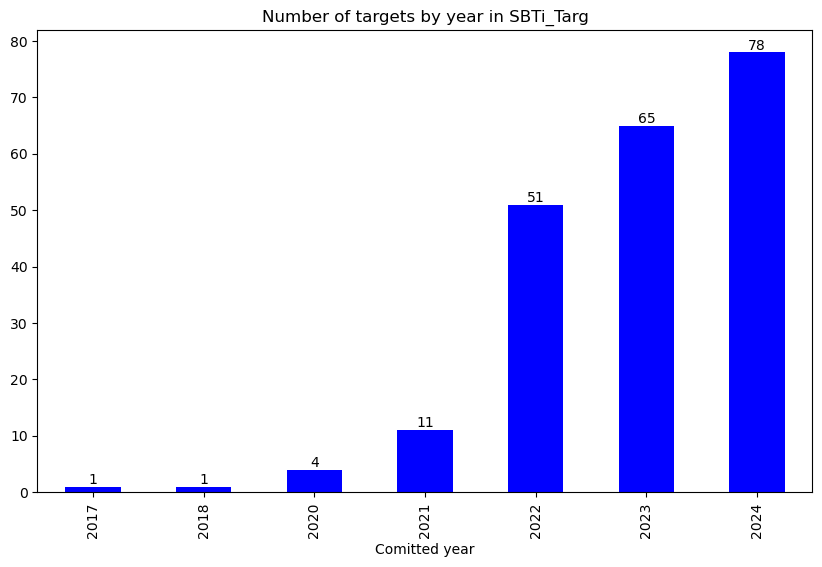

In [30]:
# Amount of targets by year in SBTi_Targ
ax = Targ_dk['Comitted year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Number of targets by year in SBTi_Targ')
# Add data labels on top of the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.5, int(p.get_height()), ha='center')
plt.show()


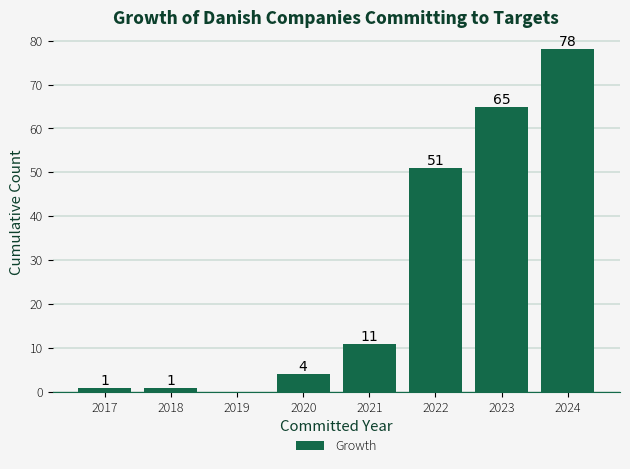

In [31]:
yearly_counts = Targ_dk['Comitted year'].value_counts().sort_index()

# Plot the accumulated growth
fig, ax = plt.subplots(facecolor="#f5f5f5")  # Set background color
bars = ax.bar(yearly_counts.index, yearly_counts.values, color="#146A4A", label="Growth")
ax.set_facecolor("#f5f5f5") 

# Add counts on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Set title and labels
ax.set_title('Growth of Danish Companies Committing to Targets', fontproperties=font_bold, fontsize=14, fontweight='bold', color="#0c402c")
ax.set_ylabel("Cumulative Count", fontproperties=font_reg, fontsize=12, color="#0c402c")
ax.set_xlabel("Committed Year", fontproperties=font_reg, fontsize=12, color="#0c402c")

# Customize ticks
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)
for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)

# Customize spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#146A4A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#146A4A", zorder=0)

# Add legend below the plot
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=10, frameon=False)
for text in legend.get_texts():
    text.set_fontproperties(font_light)

plt.tight_layout()
plt.show()

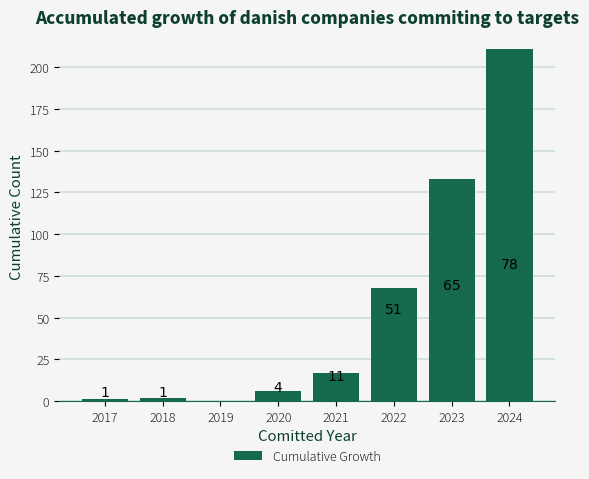

In [32]:
# Group by 'comitted_year' and count the occurrences
yearly_counts = Targ_dk['Comitted year'].value_counts().sort_index()

# Calculate the cumulative sum
yearly_counts = yearly_counts.cumsum()

# Plot the accumulated growth
fig, ax = plt.subplots(facecolor="#f5f5f5")  # Set background color
#plt.figure(figsize=(10, 6))
ax.bars = plt.bar(yearly_counts.index, yearly_counts.values, color="#146A4A", label="Cumulative Growth", )
ax.set_facecolor("#f5f5f5") 


# Add counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

ax.set_title('Accumulated growth of danish companies commiting to targets', fontproperties=font_bold, fontsize=14,fontweight='bold', color="#0c402c")

ax.set_ylabel("Cumulative Count",fontproperties=font_reg, fontsize=12, color="#0c402c")
ax.set_xlabel("Comitted Year", fontproperties=font_reg, fontsize=12, color="#0c402c")
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
for label in ax.get_xticklabels():
	label.set_fontproperties(font_light)
for label in ax.get_yticklabels():
	label.set_fontproperties(font_light)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)	
ax.spines['left'].set_visible(False)	
ax.spines['bottom'].set_color("#146A4A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#146A4A", zorder=0)

#legend below the plot
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=10, frameon=False)
for text in legend.get_texts():
    text.set_fontproperties(font_light)

plt.show()

## Types of sectors signing up

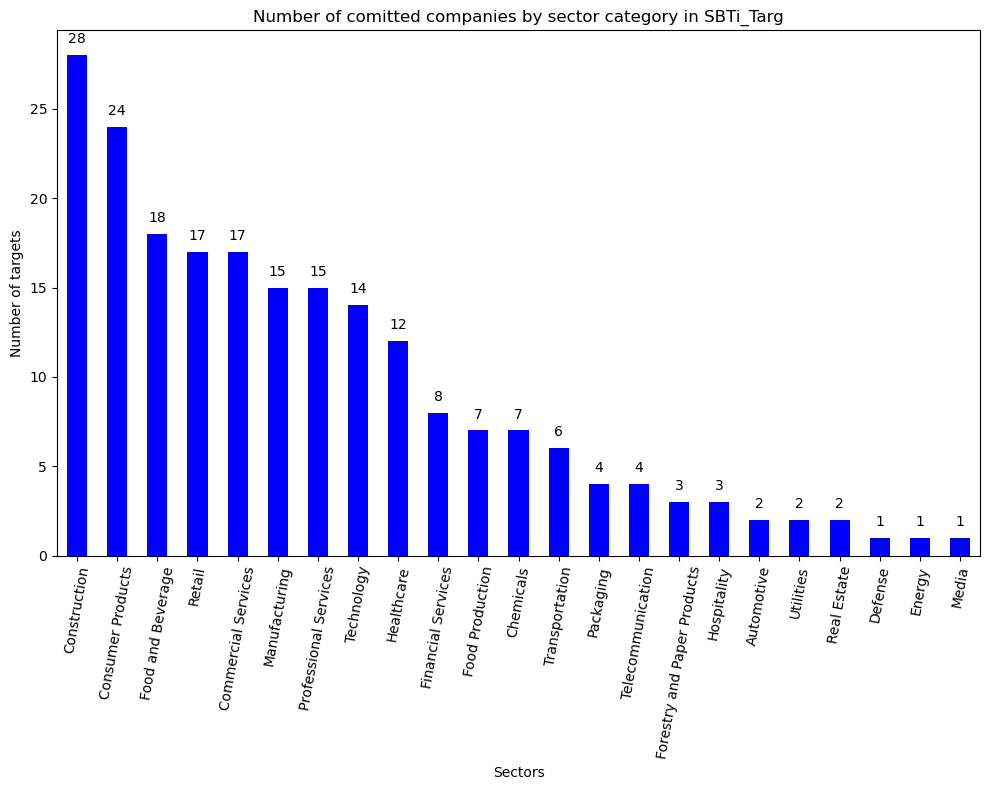

In [33]:
# Sort by size instead of index
Targ_dk['sectorCat'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(10, 8), color='blue')

plt.title('Number of comitted companies by sector category in SBTi_Targ')

# Add annotations on each bar showing the amount of targets
for i, v in enumerate(Targ_dk['sectorCat'].value_counts().sort_values(ascending=False)):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=80,verticalalignment='top')
plt.xlabel('Sectors')
plt.ylabel('Number of targets')
plt.tight_layout()
plt.show()

In [34]:
sector_count = Targ_dk.groupby('sectorCat').size().reset_index(name='count')
sector_count

,sectorCat,count
0,Automotive,2
1,Chemicals,7
2,Commercial Services,17
3,Construction,28
4,Consumer Products,24
5,Defense,1
6,Energy,1
7,Financial Services,8
8,Food Production,7
9,Food and Beverage,18


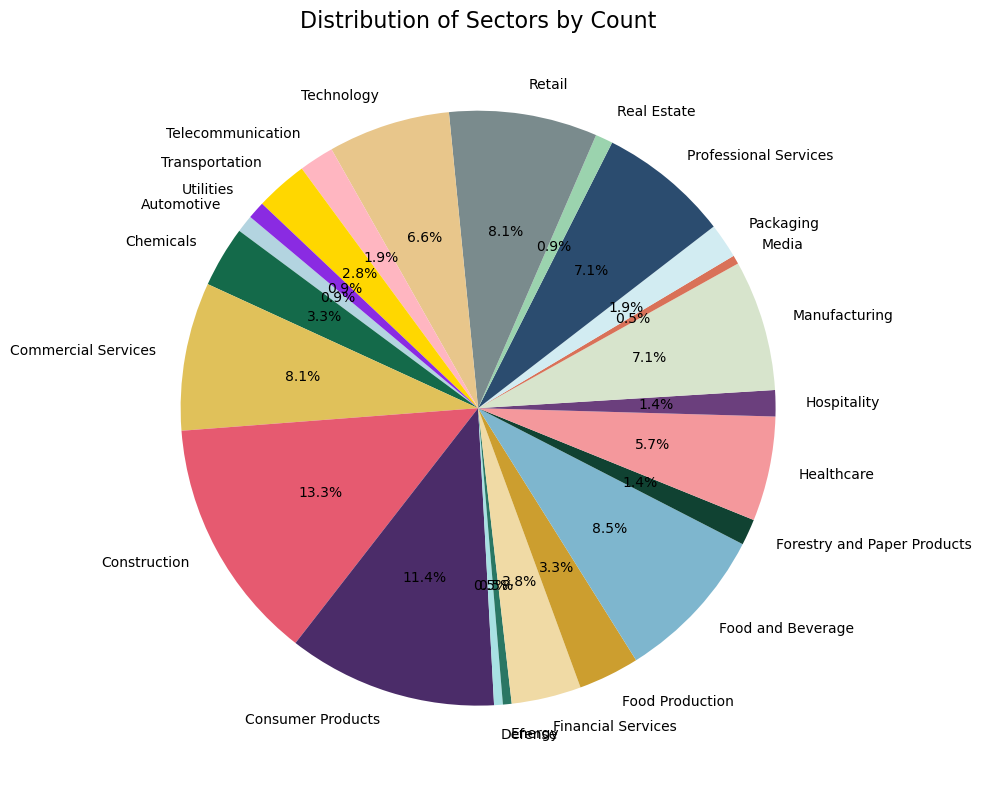

In [35]:
plt.figure(figsize=(10, 8))
#colors = plt.cm.Paired(range(len(sector_count)))  # Use a colormap for diverse colors

# Pie chart
plt.pie(
    sector_count['count'], 
    labels=sector_count['sectorCat'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sbt_palette4  # Corrected argument name
)

# Add a title
plt.title('Distribution of Sectors by Count', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

## Growth in sectors

In [36]:
sector_pivot = sector_growth.pivot(index='Comitted year', columns='sectorCat', values='count').fillna(0)

# Plot
sector_pivot.plot.area(figsize=(12, 8), alpha=0.7)
plt.title("Cumulative Sector Growth Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Count of Entries", fontsize=14)
plt.legend(title="Sector Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

NameError: name 'sector_growth' is not defined

NameError: name 'sector_growth' is not defined

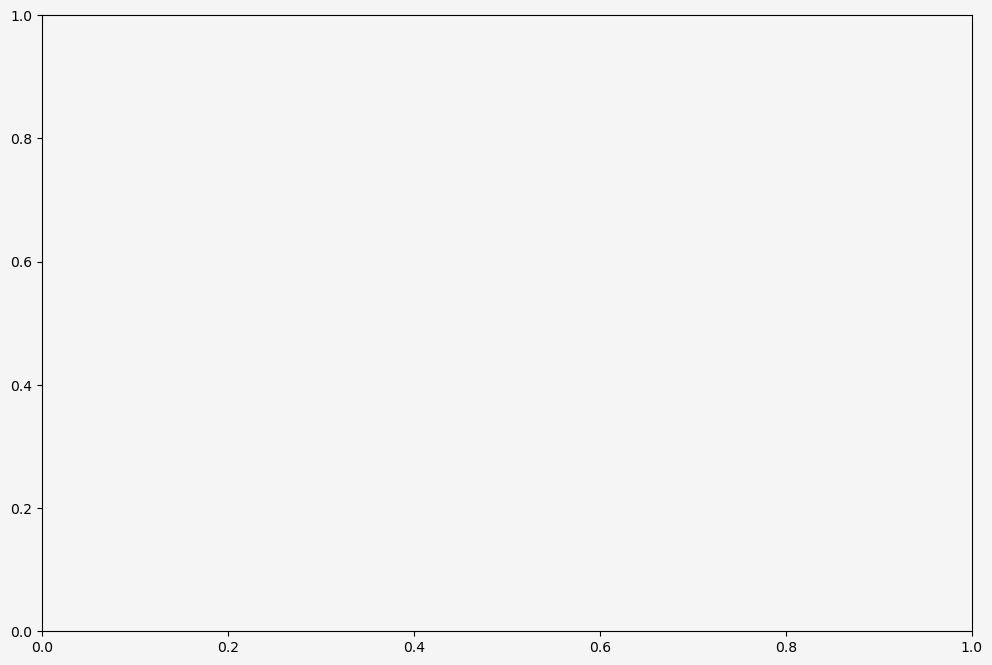

In [37]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), facecolor="#f5f5f5")  # Set figure size and background color
ax.set_facecolor("#f5f5f5")  # Set axis background color

bubble_plot = sns.scatterplot(
    data=sector_growth,
    x="Comitted year",
    y="sectorCat",
    size="count",
    sizes=(50, 500),
    alpha=0.7,
    ax=ax  # Use the same axis
)

# Add horizontal gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7, color="#146A4A", zorder=0)

# Customize the plot
bubble_plot.set_title("Bubble Plot of Sector Growth Over the Years", fontproperties=font_bold, fontsize=16, fontweight='bold', color="#0c402c")
bubble_plot.set_xlabel("Comitted Year", fontproperties=font_reg, fontsize=14, color="#0c402c")
bubble_plot.set_ylabel("Sector Category", fontproperties=font_reg, fontsize=14, color="#0c402c")

# Customize tick parameters
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)
for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)

# Customize legend
legend = ax.legend(title="Count of Entries", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10, frameon=False, ncol=1 , columnspacing=10)
for text in legend.get_texts():
    text.set_fontproperties(font_light)
legend.get_title().set_fontproperties(font_bold)

# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#146A4A")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Growth in organisations types

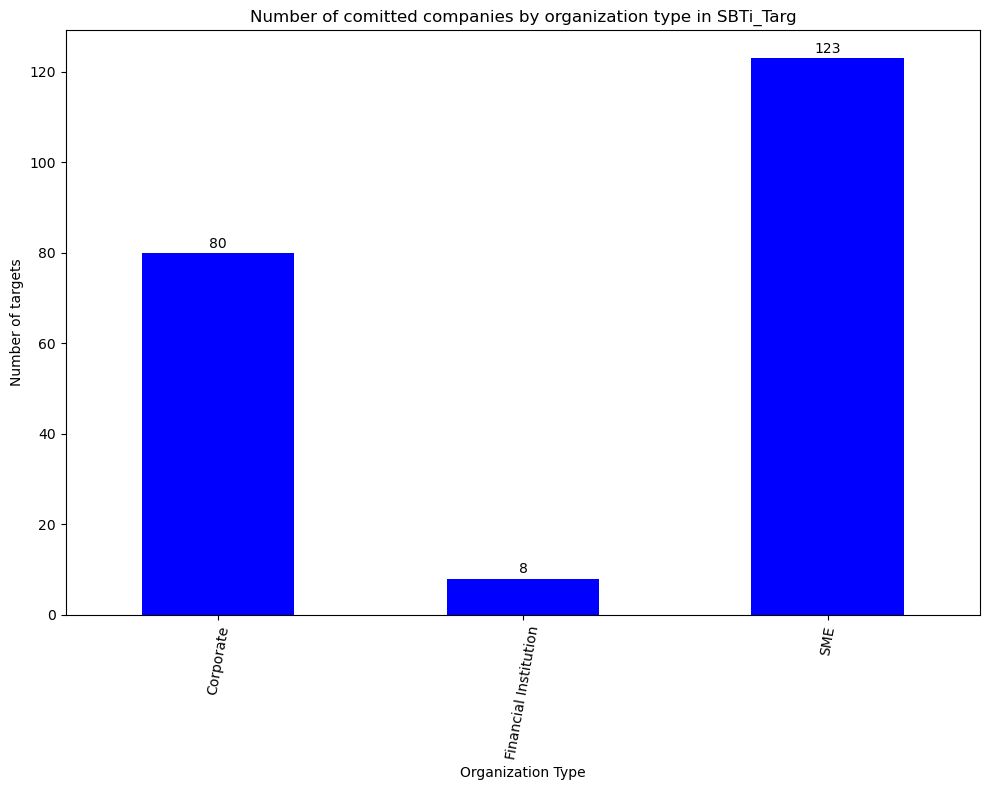

In [38]:
#show growth organization_type over the years
Targ_dk['organization_type'].value_counts().sort_index().plot(kind='bar', figsize=(10, 8), color='blue')
plt.title('Number of comitted companies by organization type in SBTi_Targ')
# Add annotations on each bar showing the amount of targets
for i, v in enumerate(Targ_dk['organization_type'].value_counts().sort_index()):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=80,verticalalignment='top')
plt.xlabel('Organization Type')
plt.ylabel('Number of targets')
plt.tight_layout()
plt.show()


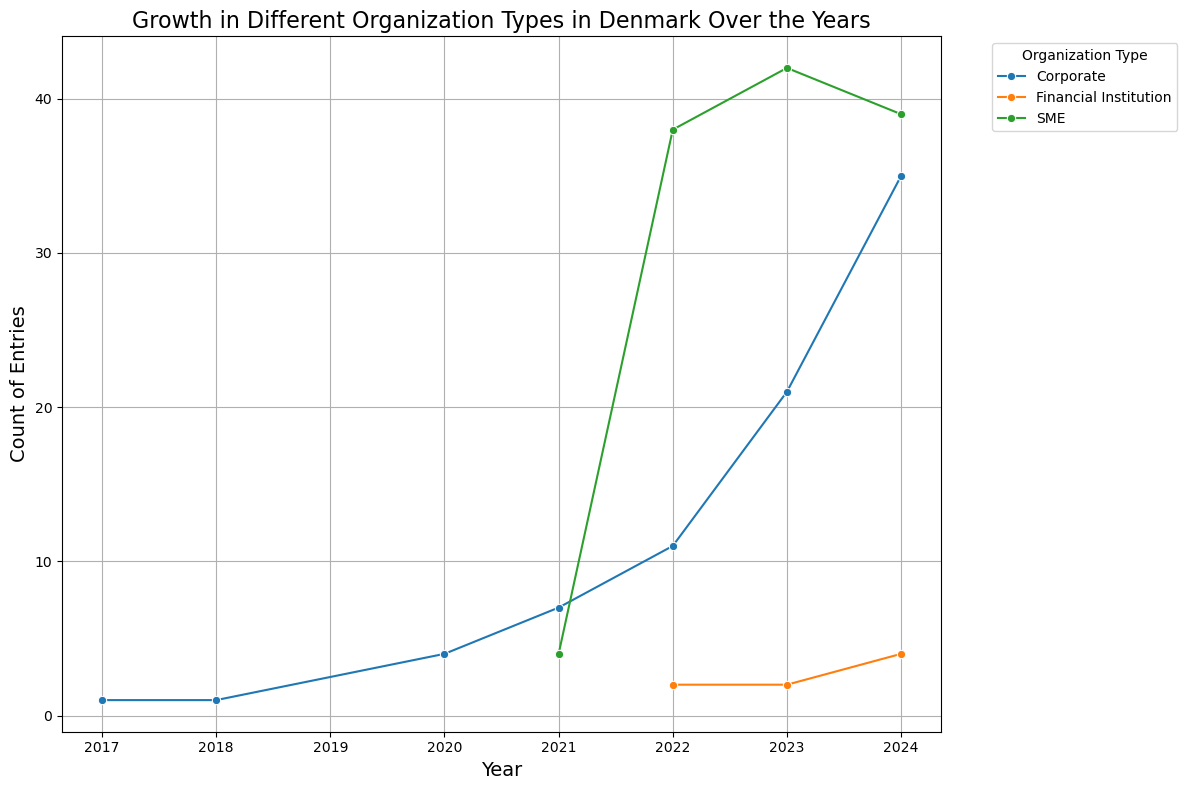

In [39]:
#group organization_type over year_updated years
org_growth = Targ_dk.groupby(['organization_type', 'Comitted year']).size().reset_index(name='count')
org_growth
#plot org_growth
plt.figure(figsize=(12, 8))
sns.lineplot(data=org_growth, x='Comitted year', y='count', hue='organization_type', marker='o')
# Customize the plot
plt.title('Growth in Different Organization Types in Denmark Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of Entries', fontsize=14)
plt.legend(title='Organization Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()
#plot org_growth as barplot


In [40]:
Targ_dk
org_growth = Targ_dk.groupby(['organization_type', 'Comitted year']).size().reset_index(name='count')
org_growth

,organization_type,Comitted year,count
0,Corporate,2017,1
1,Corporate,2018,1
2,Corporate,2020,4
3,Corporate,2021,7
4,Corporate,2022,11
5,Corporate,2023,21
6,Corporate,2024,35
7,Financial Institution,2022,2
8,Financial Institution,2023,2
9,Financial Institution,2024,4


In [41]:
df = pd.DataFrame({
    'organization_type': ['Corporate', 'Corporate', 'Corporate', 'Corporate', 'Corporate', 'Corporate', 'Corporate',
                          'Financial Institution', 'Financial Institution', 'Financial Institution',
                          'SME', 'SME', 'SME'],
    'Comitted year': [2017, 2018, 2020, 2021, 2022, 2023, 2024, 2022, 2023, 2024, 2021, 2022, 2023],
    'count': [1, 1, 4, 7, 11, 21, 35, 2, 2, 4, 4, 38, 4]
})

# get full range of years
all_years = pd.Series(range(df['Comitted year'].min(), df['Comitted year'].max() + 1))

# create a full index of all organization_type-year combinations
orgs = df['organization_type'].unique()
full_index = pd.MultiIndex.from_product([orgs, all_years], names=['organization_type', 'Comitted year'])

# reindex the dataframe
df_full = df.set_index(['organization_type', 'Comitted year']).reindex(full_index, fill_value=0).reset_index()

# compute cumulative count per organization_type
df_full['cumulative_count'] = df_full.groupby('organization_type')['count'].cumsum()

print(df_full)

        organization_type  Comitted year  count  cumulative_count
0               Corporate           2017      1                 1
1               Corporate           2018      1                 2
2               Corporate           2019      0                 2
3               Corporate           2020      4                 6
4               Corporate           2021      7                13
5               Corporate           2022     11                24
6               Corporate           2023     21                45
7               Corporate           2024     35                80
8   Financial Institution           2017      0                 0
9   Financial Institution           2018      0                 0
10  Financial Institution           2019      0                 0
11  Financial Institution           2020      0                 0
12  Financial Institution           2021      0                 0
13  Financial Institution           2022      2                 2
14  Financ

In [42]:
org_growth_cum = org_growth.groupby("Comitted year")["count"].sum().reset_index()

# Calculate cumulative sum
#org_growth_cum["cumulative_total"] = org_growth_cum["count"].cumsum()

In [43]:
org_growth_cum

,Comitted year,count
0,2017,1
1,2018,1
2,2020,4
3,2021,11
4,2022,51
5,2023,65
6,2024,78


In [46]:
source = ColumnDataSource(org_growth)

# Create a figure
p = figure(title="Growth of Organization Types Over the Years",
           x_axis_label="Year", y_axis_label="Count",
           x_range=(2016.5, 2024.5),
           tools="pan,wheel_zoom,box_zoom,reset,save",
           width=800, height=400)

# Add a line for each organization type
organization_types = org_growth['organization_type'].unique()
colors = ["#4B2C69", "#146A4A", "#E0C15A"]  # Assign colors to each type

for org_type, color in zip(organization_types, colors):
    org_data = org_growth[org_growth['organization_type'] == org_type]
    p.line(x='Comitted year', y='count', source=ColumnDataSource(org_data), color=color, legend_label=org_type, line_width=2)
    p.circle(x='Comitted year', y='count', source=ColumnDataSource(org_data), color=color, size=8)

# Add a hover tool
hover = HoverTool()
hover.tooltips = [("Year", "@{Comitted year}"), ("Count", "@count")]
p.add_tools(hover)

# Style the plot
p.legend.title = "Organization Types"
p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Show the plot
show(p)

In [47]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource
import pandas as pd


# Create a Bokeh ColumnDataSource from the dataframe
source = ColumnDataSource(org_growth_cum)

# Create a figure
p = figure(title="Growth of Organization Types Over the Years",
           x_axis_label="Year", y_axis_label="Count",
           x_range=(2016.5, 2024.5),
           tools="pan,wheel_zoom,box_zoom,reset,save",
           width=800, height=400,
           background_fill_color="#f5f5f5")  # Plot background

# Add a line for each organization type
organization_types = org_growth_cum['organization_type'].unique()
colors = ["#4B2C69", "#146A4A", "#E0C15A"]  # Assign colors to each type

for org_type, color in zip(organization_types, colors):
    org_data = org_growth[org_growth['organization_type'] == org_type]
    p.line(x='Comitted year', y='count', source=ColumnDataSource(org_data),
           color=color, legend_label=org_type, line_width=2)
    p.circle(x='Comitted year', y='count', source=ColumnDataSource(org_data),
             color=color, size=8)

# Add a hover tool
hover = HoverTool()
hover.tooltips = [("Year", "@{Comitted year}"), ("Count", "@count")]
hover.point_policy = "snap_to_data"  # Tooltip will follow the mouse cursor
p.add_tools(hover)

# Style the plot
p.title.text_font = "bold"
p.title.text_font_size = "14pt"
p.title.text_color = "#0c402c"

p.xaxis.axis_label_text_font = "normal"
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.axis_label_text_color = "#0c402c"

p.yaxis.axis_label_text_font = "normal"
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_color = "#0c402c"

p.xaxis.major_label_text_font = "normal"
p.xaxis.major_label_text_font_size = "10pt"
p.yaxis.major_label_text_font = "normal"
p.yaxis.major_label_text_font_size = "10pt"

p.outline_line_color = None  # Remove outer border
p.grid.grid_line_color = "#146A4A"
p.grid.grid_line_alpha = 0.2  # Light gridlines
p.grid.grid_line_dash = "solid"

p.legend.title = "Organization Types"
p.legend.title_text_font = "normal"
p.legend.title_text_font_size = "12pt"
p.legend.title_text_color = "#0c402c"
p.legend.label_text_font = "normal"
p.legend.label_text_font_size = "10pt"
p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Show the plot
show(p)

KeyError: 'organization_type'

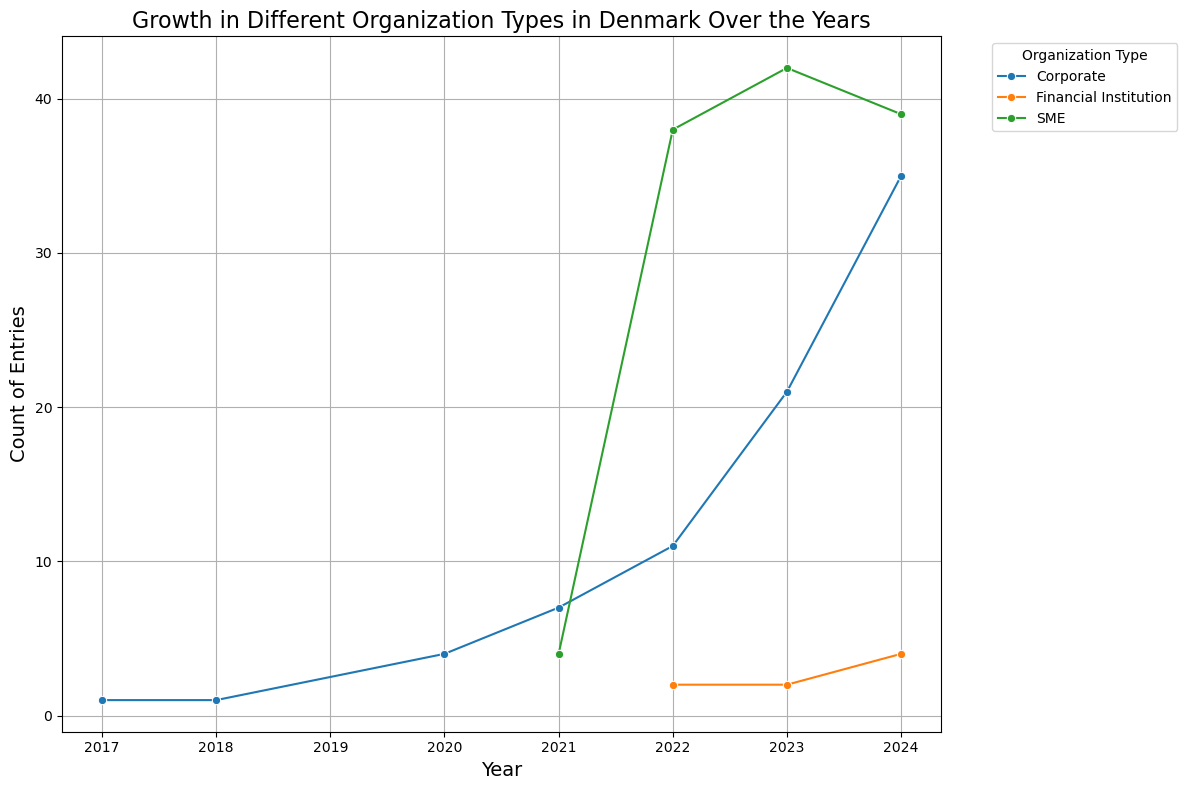

In [48]:
#group organization_type over year_updated years
org_growth = Targ_dk.groupby(['organization_type', 'Comitted year']).size().reset_index(name='count')

#plot org_growth
plt.figure(figsize=(12, 8))
sns.lineplot(data=org_growth, x='Comitted year', y='count', hue='organization_type', marker='o')
# Customize the plot
plt.title('Growth in Different Organization Types in Denmark Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of Entries', fontsize=14)
plt.legend(title='Organization Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()
#plot org_growth as barplot


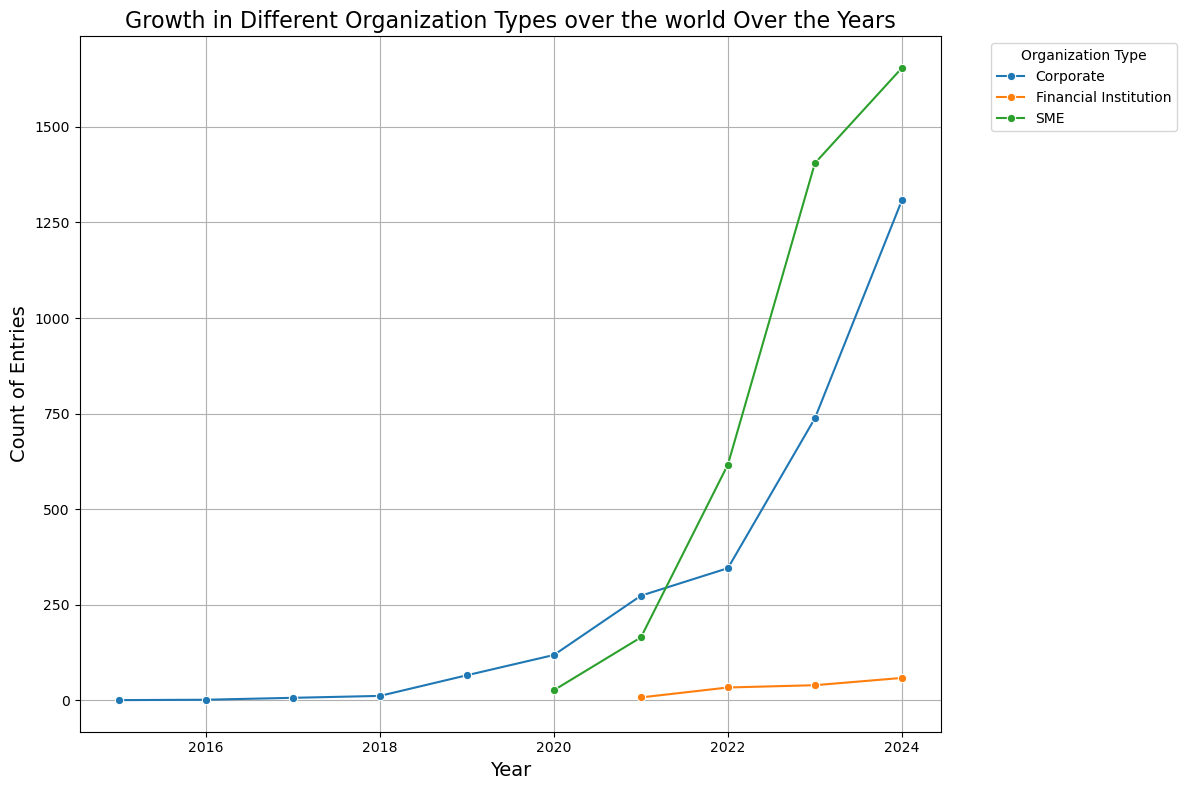

In [49]:
#group organization_type over year_updated years
org_growth2 = Targ.groupby(['organization_type', 'Comitted year']).size().reset_index(name='count')
org_growth2
#plot org_growth2
plt.figure(figsize=(12, 8))
sns.lineplot(data=org_growth2, x='Comitted year', y='count', hue='organization_type', marker='o')
# Customize the plot
plt.title('Growth in Different Organization Types over the world Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of Entries', fontsize=14)
plt.legend(title='Organization Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()
#plot org_growth2 as barplot

## What targets does the danish companies sign up with

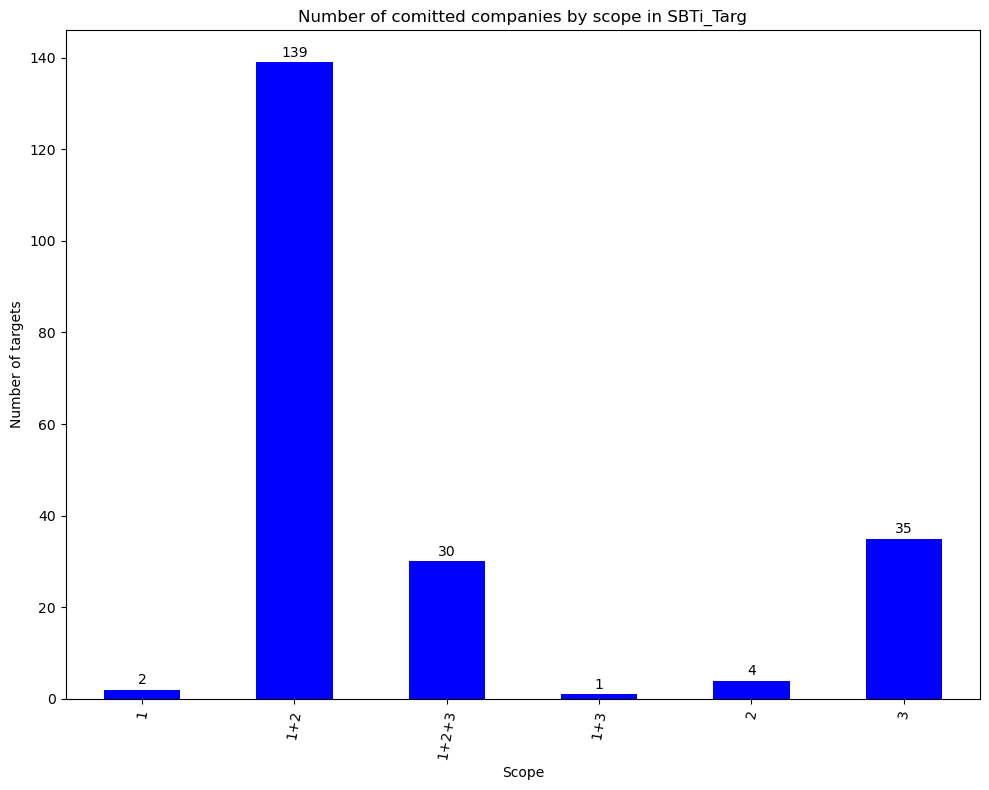

In [50]:
Targ_dk['scope'].unique()
#show growth scope over the years
Targ_dk['scope'].value_counts().sort_index().plot(kind='bar', figsize=(10, 8), color='blue')
plt.title('Number of comitted companies by scope in SBTi_Targ')
# Add annotations on each bar showing the amount of targets
for i, v in enumerate(Targ_dk['scope'].value_counts().sort_index()):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=80,verticalalignment='top')
plt.xlabel('Scope')
plt.ylabel('Number of targets')
plt.tight_layout()
plt.show()

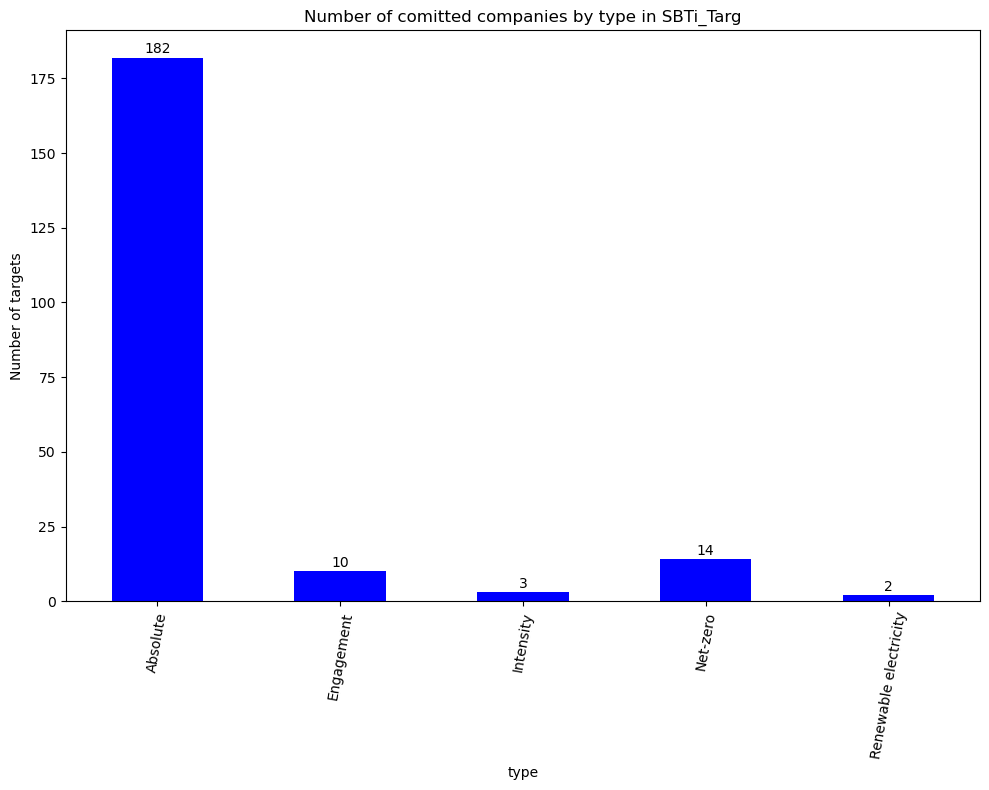

In [51]:
Targ_dk['type'].value_counts().sort_index().plot(kind='bar', figsize=(10, 8), color='blue')
plt.title('Number of comitted companies by type in SBTi_Targ')
# Add annotations on each bar showing the amount of targets
for i, v in enumerate(Targ_dk['type'].value_counts().sort_index()):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=80,verticalalignment='top')
plt.xlabel('type')
plt.ylabel('Number of targets')
plt.tight_layout()
plt.show()

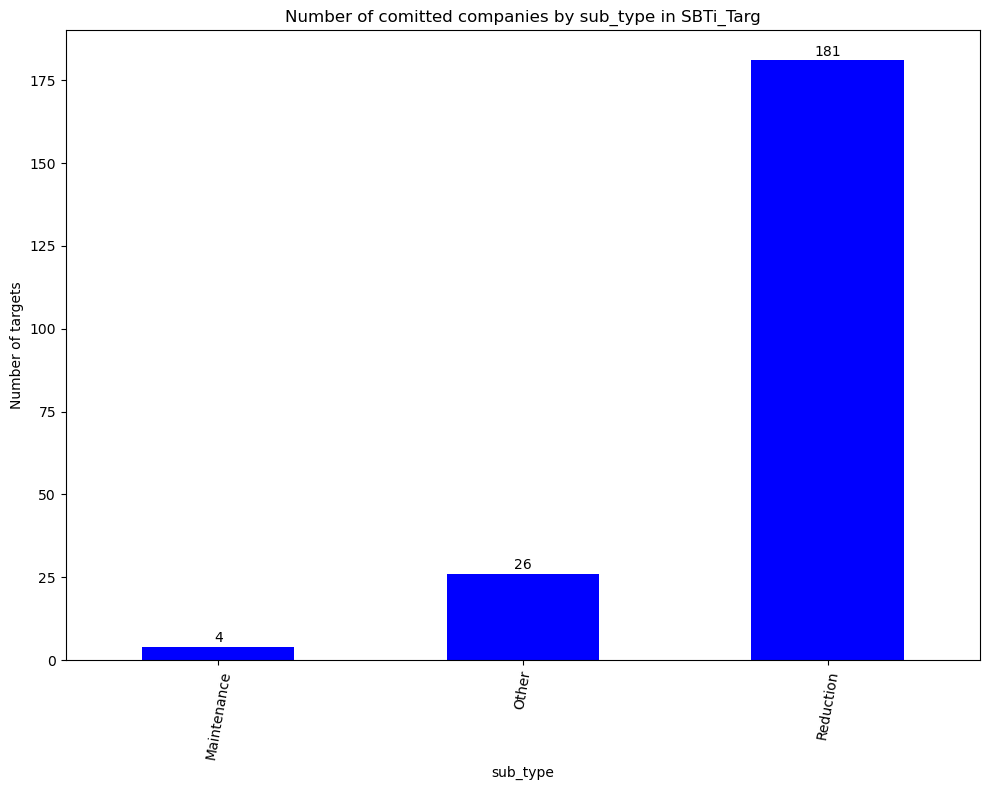

In [52]:
Targ_dk['sub_type'].value_counts().sort_index().plot(kind='bar', figsize=(10, 8), color='blue')
plt.title('Number of comitted companies by sub_type in SBTi_Targ')
# Add annotations on each bar showing the amount of targets
for i, v in enumerate(Targ_dk['sub_type'].value_counts().sort_index()):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=80,verticalalignment='top')
plt.xlabel('sub_type')
plt.ylabel('Number of targets')
plt.tight_layout()
plt.show()

# Which companies have removed their commitment? and why?


## Below graphs are fore net_zero commitments that have been removed

In [53]:
#new datafram with only companies removing their commitments to targets
Comp_dk_removed_NZ= Comp_dk[Comp_dk[' net_zero_status'] == 'Commitment removed']

In [54]:
Comp_dk_removed_NZ=Comp_dk_removed_NZ.copy()


In [55]:
Comp_dk_removed_NZ['company_name']

866         Carlsberg Group
4630    Vestas Wind Systems
4100             Stryhns AS
4595          SM Industries
3600           REMONDIS A/S
2870     Merkur Andelskasse
4061            STARK Group
3174                   NREP
1815      GN Store Nord A/S
999                  Clever
670            BioMar Group
3146          Norican Group
3120                   NNIT
Name: company_name, dtype: object

In [56]:
yearly_counts = Comp_dk_removed_NZ.groupby('year_updated').size().reset_index(name='count')
yearly_counts 

,year_updated,count
0,2019,1
1,2020,1
2,2021,1
3,2022,5
4,2023,4
5,2025,1


### Count of removed commitments over the years

   year_updated  count
0          2019      1
1          2020      1
2          2021      1
3          2022      5
4          2023      4
5          2025      1


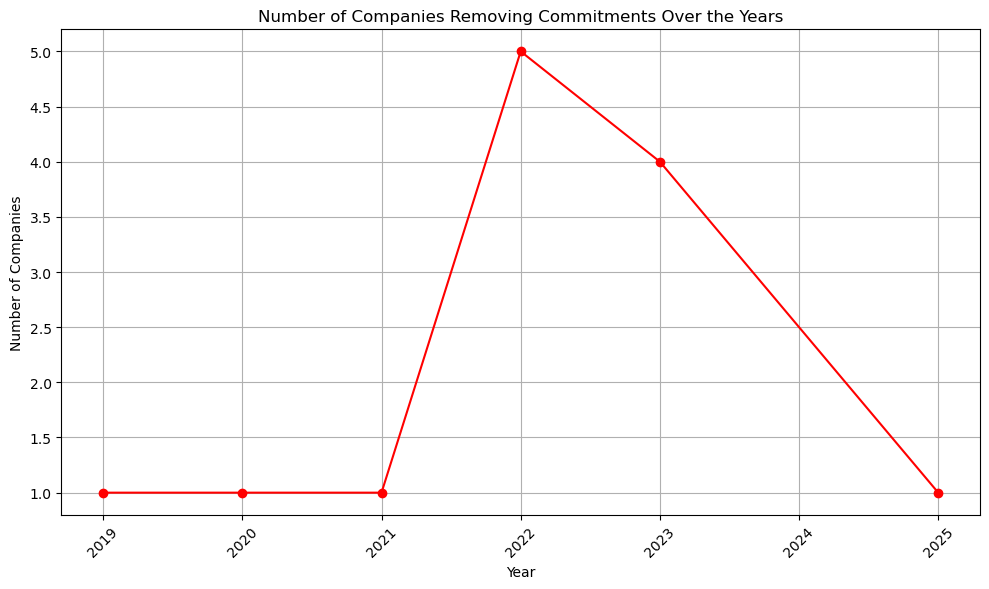

In [57]:
yearly_counts = Comp_dk_removed_NZ.groupby('year_updated').size().reset_index(name='count')
print(yearly_counts)
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts['year_updated'], yearly_counts['count'], marker='o', linestyle='-', color='red')
plt.title('Number of Companies Removing Commitments Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
#plt.xticks(yearly_counts['year_updated'], rotation=45)
plt.xticks(range(2019,2026,1), rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### Reasons they removed their commitment

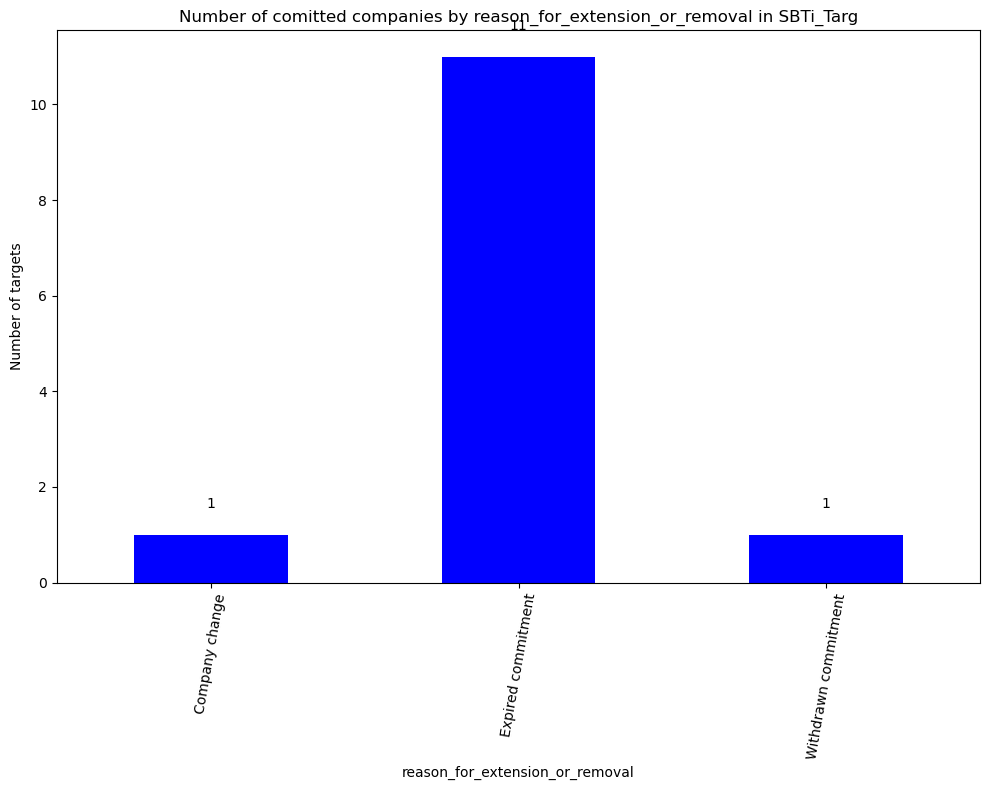

In [58]:
Comp_dk_removed_NZ['reason_for_extension_or_removal'].value_counts().sort_index().plot(kind='bar', figsize=(10, 8), color='blue')
plt.title('Number of comitted companies by reason_for_extension_or_removal in SBTi_Targ')
# Add annotations on each bar showing the amount of targets
for i, v in enumerate(Comp_dk_removed_NZ['reason_for_extension_or_removal'].value_counts().sort_index()):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=80,verticalalignment='top')
plt.xlabel('reason_for_extension_or_removal')
plt.ylabel('Number of targets')
plt.tight_layout()
plt.show()

### Sectors that removed their commitments

             sectorCat  count
0         Construction      1
1    Consumer Products      1
2               Energy      1
3   Financial Services      1
4      Food Production      1
5    Food and Beverage      2
6        Manufacturing      2
7          Real Estate      1
8               Retail      1
9           Technology      1
10           Utilities      1


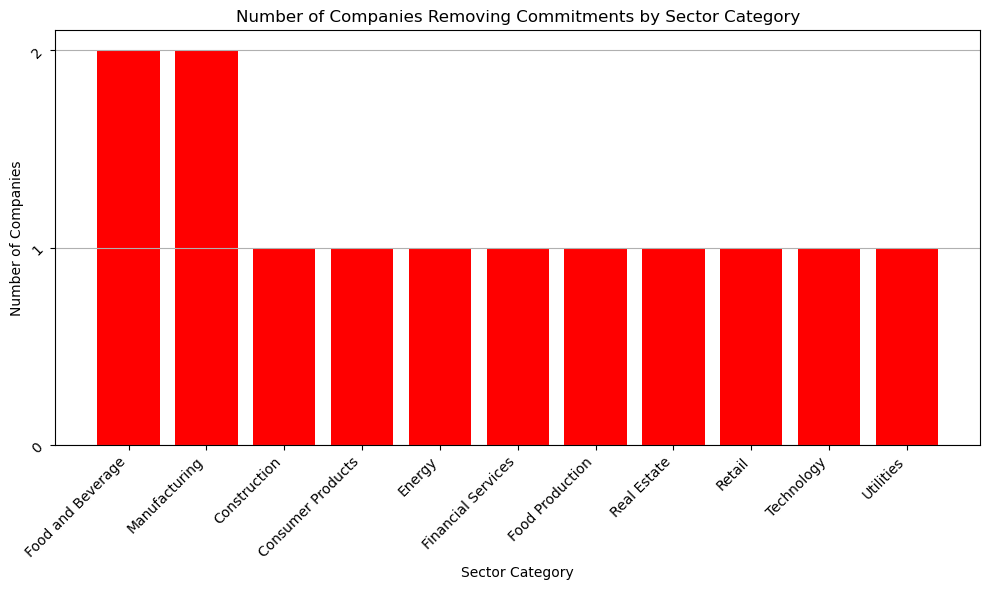

In [59]:
sector_retract_count = Comp_dk_removed_NZ.groupby('sectorCat').size().reset_index(name='count')
print(sector_retract_count)
# Sort by size instead of index
sector_retract_count = sector_retract_count.sort_values(by='count', ascending=False)
# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(sector_retract_count['sectorCat'], sector_retract_count['count'], color='red')
plt.title('Number of Companies Removing Commitments by Sector Category')
plt.xlabel('Sector Category')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0,3,1),rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


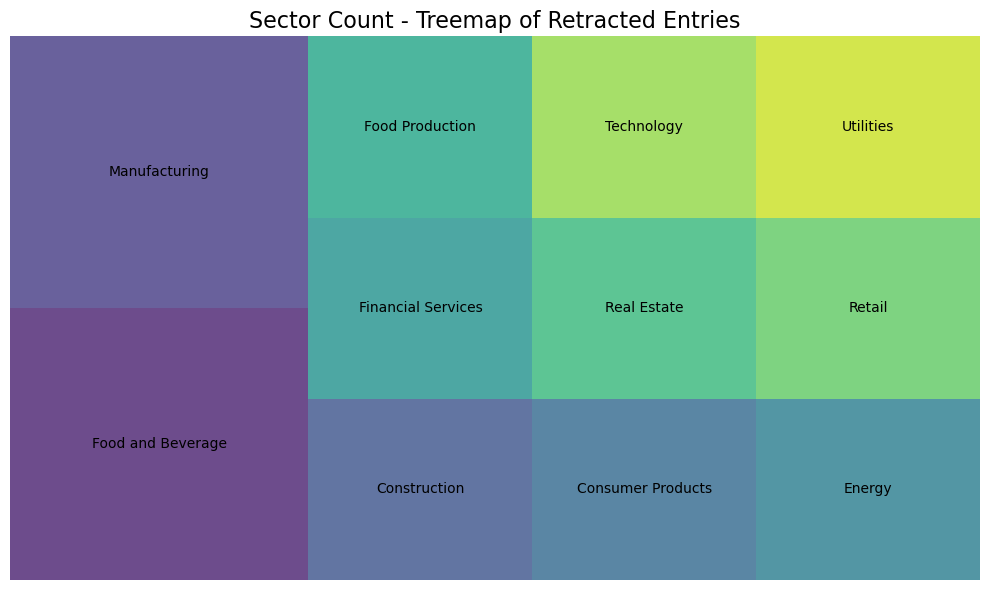

In [60]:
import squarify  # Install with `pip install squarify`

# Create a treemap
plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=sector_retract_count['count'], 
    label=sector_retract_count['sectorCat'], 
    color=sns.color_palette('viridis', len(sector_retract_count)), 
    alpha=0.8
)

# Add title
plt.title('Sector Count - Treemap of Retracted Entries', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

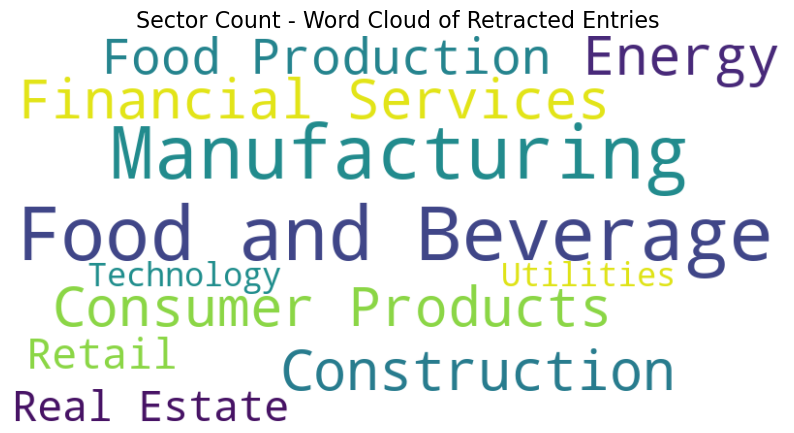

In [61]:
from wordcloud import WordCloud

# Create a dictionary for the word cloud
wordcloud_data = dict(zip(sector_retract_count['sectorCat'], sector_retract_count['count']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Sector Count - Word Cloud of Retracted Entries', fontsize=16)
plt.show()

In [62]:
sector_retract_count

,sectorCat,count
5,Food and Beverage,2
6,Manufacturing,2
0,Construction,1
1,Consumer Products,1
2,Energy,1
3,Financial Services,1
4,Food Production,1
7,Real Estate,1
8,Retail,1
9,Technology,1


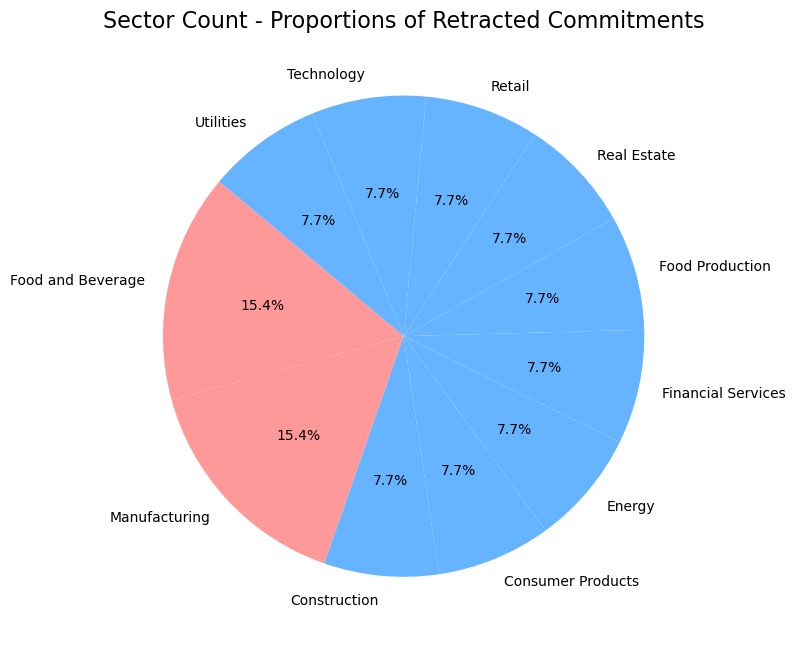

In [63]:
plt.figure(figsize=(8, 8))
colors = ['#ff9999' if count > 1 else '#66b3ff' for count in sector_retract_count['count']]
plt.pie(
    sector_retract_count['count'], 
    labels=sector_retract_count['sectorCat'], 
    autopct='%1.1f%%', startangle=140, colors=colors
)

# Add title
plt.title('Sector Count - Proportions of Retracted Commitments', fontsize=16)
plt.tight_layout()
plt.show()

### Exploration/ comparison of the companies that removed their commitment

In [64]:
Comp_dk_removed_NZ[near_term_status].value_counts()

NameError: name 'near_term_status' is not defined

## Below graphs are for Near_term commitments that have been removed

In [ ]:
#new datafram with only companies removing their commitments to targets
Comp_dk_removed_NT= Comp_dk[Comp_dk['near_term_status'] == 'Commitment removed']

In [ ]:
Comp_dk_removed_NT=Comp_dk_removed_NT.copy()


In [ ]:
Comp_dk_removed_NT['company_name']

2381          Jupiter Bach
2689         LTP Group A/S
4595         SM Industries
3600          REMONDIS A/S
2889       Micro Matic A/S
2870    Merkur Andelskasse
3174                  NREP
999                 Clever
Name: company_name, dtype: object

In [ ]:
yearly_counts = Comp_dk_removed_NT.groupby('year_updated').size().reset_index(name='count')
yearly_counts 

,year_updated,count
0,2021,2
1,2022,5
2,2023,1


   year_updated  count
0          2021      2
1          2022      5
2          2023      1


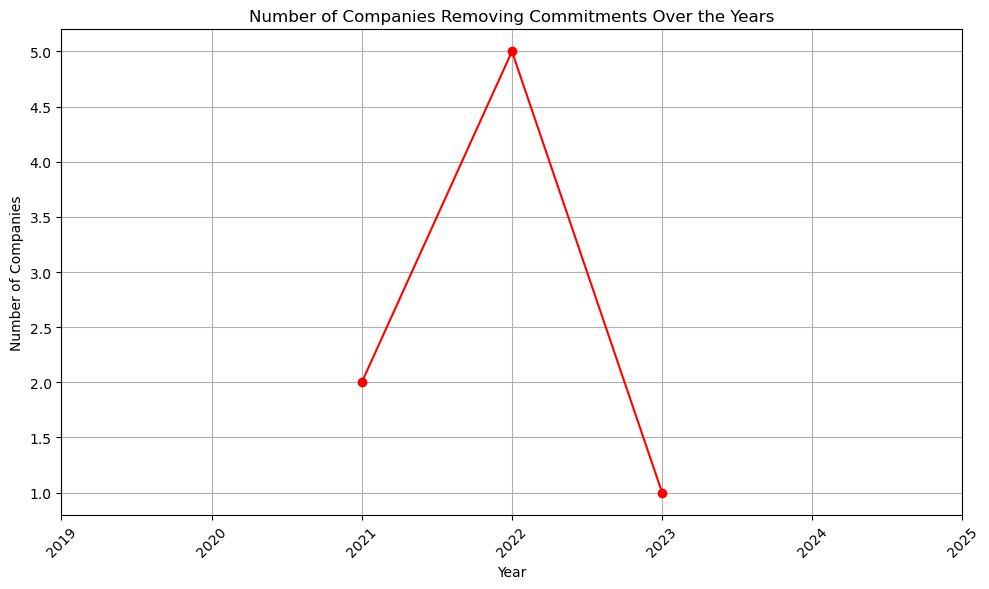

In [ ]:
yearly_counts = Comp_dk_removed_NT.groupby('year_updated').size().reset_index(name='count')
print(yearly_counts)
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts['year_updated'], yearly_counts['count'], marker='o', linestyle='-', color='red')
plt.title('Number of Companies Removing Commitments Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
#plt.xticks(yearly_counts['year_updated'], rotation=45)
plt.xticks(range(2019,2026,1), rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

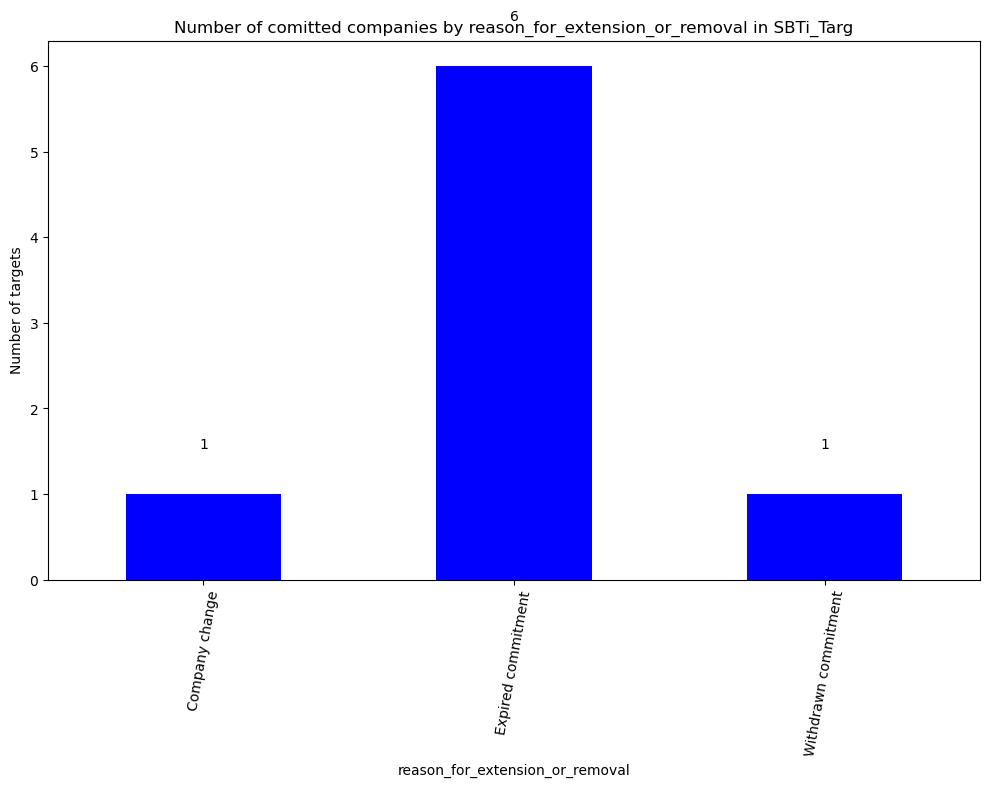

In [ ]:
Comp_dk_removed_NT['reason_for_extension_or_removal'].value_counts().sort_index().plot(kind='bar', figsize=(10, 8), color='blue')
plt.title('Number of comitted companies by reason_for_extension_or_removal in SBTi_Targ')
# Add annotations on each bar showing the amount of targets
for i, v in enumerate(Comp_dk_removed_NT['reason_for_extension_or_removal'].value_counts().sort_index()):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=80,verticalalignment='top')
plt.xlabel('reason_for_extension_or_removal')
plt.ylabel('Number of targets')
plt.tight_layout()
plt.show()

In [ ]:
# a change